<a href="https://colab.research.google.com/github/davidofitaly/06_classification_projects/blob/main/01_logistic_regression/01_breast_cancer_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Table of contents:
1. [Import of libraries](#0)
2. [Data loading](#1)
3. [Data description](#2)
4. [Create a copy data](#3)
5. [Data mining and precprocessing](#4)
6. [Correlation](#5)
7. [Division of data into training data and test collection](#6)
8. [Data standarization](#7)
9. [Logistic regression](#8)
10. [Model-based prediction](#9)
11. [Model-evaluation](#10)
12. [ROC AUC](#11)





### <a name='0'> </a> Import of libraries

In [49]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go
import seaborn as sns
import sklearn

# Set the font scale for Seaborn plots
sns.set(font_scale=1.3)

np.set_printoptions(precision=6, suppress=True, edgeitems=10, linewidth=100000,
                    formatter= dict(float=lambda x: f'{x:.2f}'))

# Print the version of the imported libraries for reference
print(f'Pandas: {pd.__version__}')
print(f'Numpy: {np.__version__}')
print(f'Sklearn: {sklearn.__version__}')
print(f'Seaborn: {sns.__version__}')

Pandas: 2.2.2
Numpy: 1.26.4
Sklearn: 1.5.2
Seaborn: 0.13.1


### <a name='1'> </a> Data loading

In [2]:
# Import load_breast_cancer datasets
from sklearn.datasets import load_breast_cancer

# Load load_breast_cancer
cancer_data = load_breast_cancer()

In [3]:
# Display of collection keys
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# Create DataFrame and add target
cancer_df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)
cancer_df['target'] = cancer_data.target

cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### <a name='2'> </a> Data description



- **mean radius**: The average radius of the tumor, calculated from the dimensions of the tumor cells.
- **mean texture**: The variation in the texture of the cells, typically measured in terms of intensity variation in the grayscale images of the cell nuclei.
- **mean perimeter**: The average perimeter of the tumor, representing the boundary length of the tumor cells.
- **mean area**: The mean area of the tumor, reflecting the total size of the tumor cells.
- **mean smoothness**: The smoothness of the tumor surface, calculated as the variation between neighboring points on the boundary.
- **mean compactness**: A measure of the compactness of the tumor cells, calculated as perimeter² / area - 1.
- **mean concavity**: The degree to which the tumor cells are concave, representing how much the cell shapes deviate inward.
- **mean concave points**: The number of concave portions of the tumor boundary.
- **mean symmetry**: The symmetry of the tumor cells, indicating how symmetrical the shape of the cells is.
- **mean fractal dimension**: A measure of the complexity of the tumor boundary, calculated using fractal geometry principles.

In addition to the "mean" values, the dataset also includes:
- **standard error** for each of the above features, indicating the variability.
- **worst values**, which are the largest values observed for each feature.

### Target: Diagnosis
- **target**: This is the target variable, representing the diagnosis:
  - `0`: Malignant
  - `1`: Benign

Each sample in the dataset is labeled with one of these two outcomes, indicating whether the tumor is cancerous (malignant) or non-cancerous (benign).


### <a name='3'> </a> Create a copy data

In [5]:
# Create a copy of the DataFrame
df = cancer_df.copy()

# Display DataFrame information (columns, data types, non-null counts)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### <a name='4'> </a> Data mining and precprocessing

- Duplicates

In [6]:
# Show rows that are duplicates
df[df.duplicated()]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target


- Missing values

In [7]:
# Count the numer of missing (null) values in each column
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


- Describe data

In [8]:
# Show summary statistics, transposed for better readability
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


- Data distribution

target
1    357
0    212
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


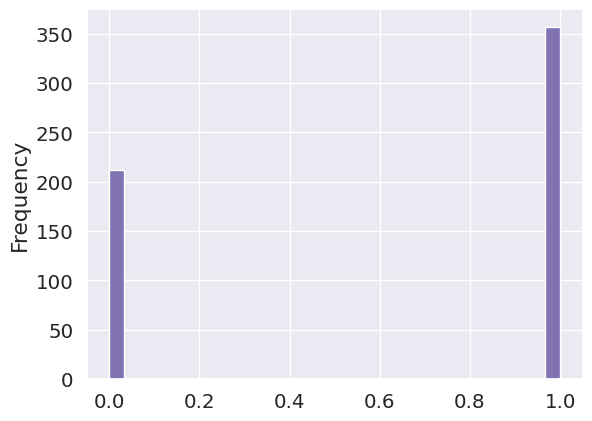

In [9]:
print(df['target'].value_counts())
print(df.target.plot(kind='hist', bins=30, color='m'))


Axes(0.22375,0.11;0.5775x0.77)


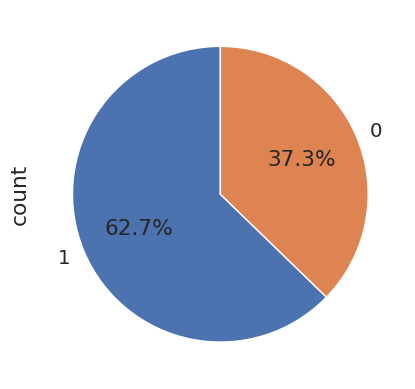

In [10]:
distribution_target = df['target'].value_counts()
print(distribution_target.plot(kind='pie', autopct = '%1.1f%%', startangle=90))

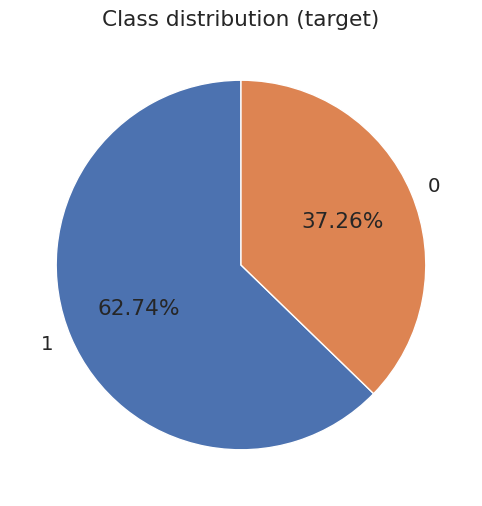

In [11]:
target_counts = df['target'].value_counts()

# Create a plot-pie
plt.figure(figsize=(8, 6))
target_counts.plot(kind='pie', autopct='%1.2f%%', startangle=90)
plt.title('Class distribution (target)')
plt.ylabel('')
plt.show()


mean radius
12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: count, Length: 456, dtype: int64
Axes(0.125,0.11;0.775x0.77)


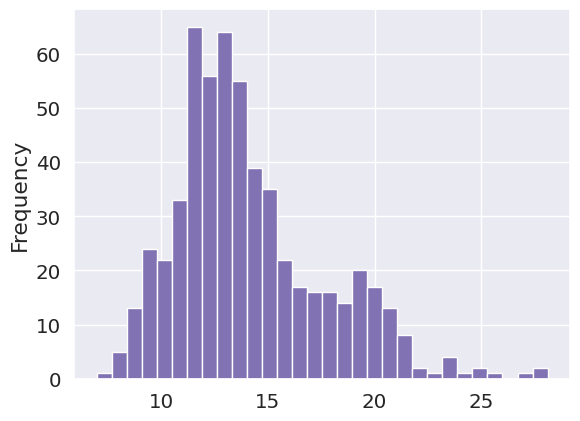

In [12]:
print(df['mean radius'].value_counts())
print(df['mean radius'].plot(kind='hist', bins=30, color='m'))

mean concavity
0.000000    13
0.120400     3
0.111500     2
0.033440     2
0.110300     2
            ..
0.065930     1
0.248700     1
0.287100     1
0.009193     1
0.351400     1
Name: count, Length: 537, dtype: int64
Axes(0.125,0.11;0.775x0.77)


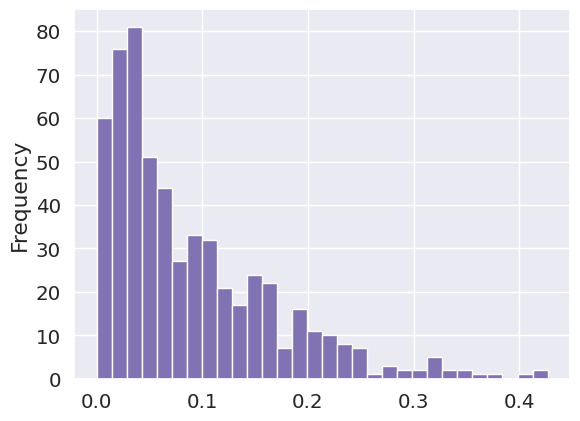

In [13]:
print(df['mean concavity'].value_counts())
print(df['mean concavity'].plot(kind='hist', bins=30, color='m'))

<bound method IndexOpsMixin.value_counts of 0      25.380
1      24.990
2      23.570
3      14.910
4      22.540
        ...  
564    25.450
565    23.690
566    18.980
567    25.740
568     9.456
Name: worst radius, Length: 569, dtype: float64>
Axes(0.125,0.11;0.775x0.77)


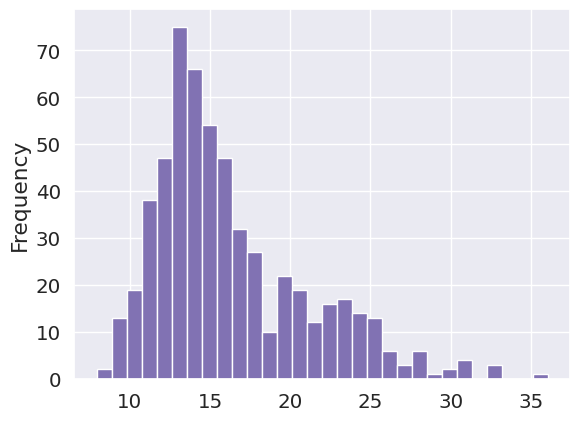

In [14]:
print(df['worst radius'].value_counts)
print(df['worst radius'].plot(kind='hist', bins=30, color='m'))

### <a name='5'> </a> Correlation

In [15]:
# Calculate the correlation matrix for the DataFrame
corr = df.corr()
corr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


Text(0.5, 1.0, 'Correlation Heatmap')

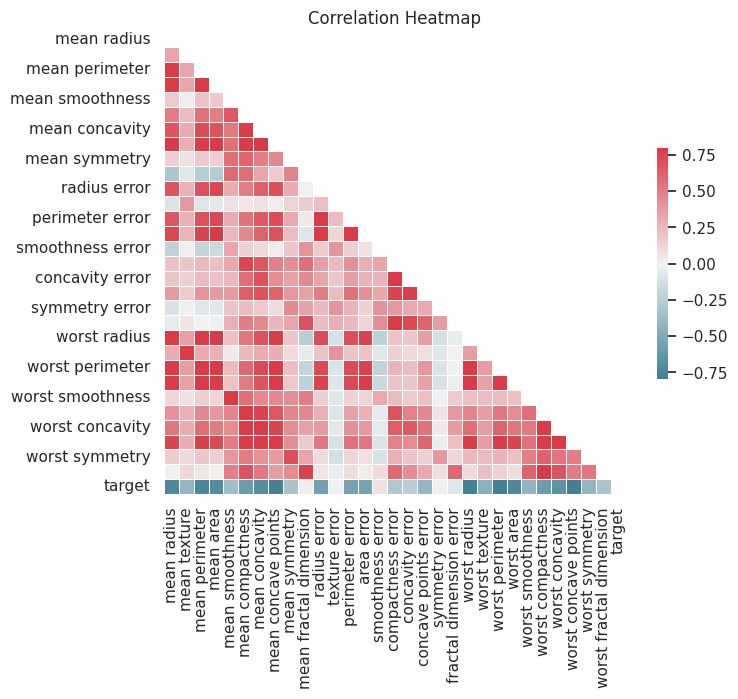

In [16]:
sns.set(style="white")  # Set the style for seaborn plots to 'white'
mask = np.zeros_like(corr, dtype=bool)  # Create a mask for the upper triangle of the correlation matrix
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 6)) # Create fiure and axis with specified size
cmap = sns.diverging_palette(220, 10, as_cmap=True) # Create a diverging color palette
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) # Draw a heatmap with the correlation matrix
plt.title('Correlation Heatmap') # Set the title of the heatmap

In [17]:
# Calculate and sort the correlation of all features in descending order
df.corr()['target'].sort_values(ascending=False)

,target
target,1.000000
smoothness error,0.067016
mean fractal dimension,0.012838
texture error,0.008303
symmetry error,0.006522
fractal dimension error,-0.077972
concavity error,-0.253730
compactness error,-0.292999
worst fractal dimension,-0.323872
mean symmetry,-0.330499


<Axes: >

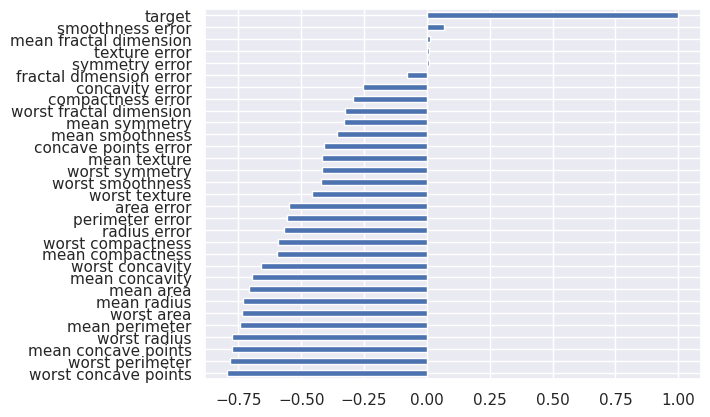

In [18]:
sns.set()
# Calculate the correlation of all features with 'Price', sort them, and plot as a horizontal bar chart
df.corr()['target'].sort_values().plot(kind='barh')

In [19]:
# Create a copy of the DataFrame
data = df.copy()

# Remove the 'Price' column from data and store it as the target variable
target = data.pop('target')

data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
# Display the first 5 rows of the target variable (Price)
target.head()

,target
0,0
1,0
2,0
3,0
4,0


### <a name='6'> </a> Division of data into training data and test collection

In [21]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

# Print the shape of each set to verify the split
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (398, 30)
X_test shape: (171, 30)
y_train shape: (398,)
y_test shape: (171,)


### <a name='7'> </a> Data standarization

In [22]:
# Import the StandardScaler class from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler and fit the scaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.85, 0.69, -0.84, -0.77, -0.08, -0.44, -0.51, -0.68, 0.77, 0.37, ..., -0.87, 0.39, -0.87, -0.77, -1.03, -0.48, -0.56, -0.76, 0.43, -0.20],
       [1.29, -0.42, 1.31, 1.19, 0.91, 1.15, 1.37, 1.33, 0.33, -0.34, ..., 1.38, -0.73, 1.31, 1.23, 1.51, 1.58, 2.26, 1.88, 1.43, 0.41],
       [-1.44, -0.12, -1.31, -1.15, 0.20, 1.68, 1.37, -0.00, 1.85, 3.45, ..., -1.28, -0.39, -1.14, -1.01, -0.45, 0.74, 0.93, 0.00, 0.38, 1.14],
       [-0.83, 2.28, -0.87, -0.75, -1.55, -1.29, -1.12, -1.26, -2.71, -1.11, ..., -0.89, 2.01, -0.95, -0.76, -1.72, -1.25, -1.32, -1.74, -2.10, -1.33],
       [-0.35, -0.85, -0.32, -0.38, -1.30, -0.18, 0.28, -0.39, -1.38, -0.50, ..., -0.48, -0.99, -0.44, -0.49, -1.43, -0.15, 0.31, -0.19, -1.42, -0.68],
       [0.40, 3.23, 0.49, 0.26, 0.66, 1.07, 1.09, 0.90, 0.99, 0.50, ..., 0.48, 3.82, 0.58, 0.29, 2.39, 1.87, 1.46, 1.33, 0.97, 1.93],
       [-0.64, -0.11, -0.67, -0.63, -0.56, -0.68, -0.79, -0.91, -1.01, -0.33, ..., -0.60, -0.14, -0.65, -0.57, -0.20, -0.42, -0.60, 

In [23]:
scaler.mean_

array([14.11, 19.42, 91.89, 652.73, 0.10, 0.11, 0.09, 0.05, 0.18, 0.06, 0.41, 1.25, 2.89, 40.53, 0.01, 0.03, 0.03, 0.01, 0.02, 0.00, 16.19, 25.84, 106.82, 871.53, 0.13, 0.26, 0.27, 0.11, 0.29, 0.08])

In [24]:
scaler.scale_

array([3.52, 4.37, 24.35, 354.34, 0.01, 0.05, 0.08, 0.04, 0.03, 0.01, 0.29, 0.54, 2.13, 48.72, 0.00, 0.02, 0.02, 0.01, 0.01, 0.00, 4.80, 6.21, 33.41, 566.32, 0.02, 0.16, 0.21, 0.07, 0.06, 0.02])

### <a name='8'> </a> Logistic regression

In [25]:
# Import LogisticRegression class form sklearn
from sklearn.linear_model import LogisticRegression

# Create an instance of the LinearRegression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

LogisticRegression()

### <a name='9'> </a> Model-based Prediction

In [26]:
y_true = y_test.copy()
y_pred = log_reg.predict(X_test)

# Create a DataFrame with true and predicted values
predictions = pd.DataFrame(data={'y_true': y_test, 'y_pred':y_pred})
predictions = predictions.reset_index(drop=True)
predictions.head()

,y_true,y_pred
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0


In [65]:
# Get the predicted probabilities for the test set using the logistic regression model
y_prob = log_reg.predict_proba(X_test)

# Create a DataFrame to hold the predicted probabilities for each class
predictions_proba = pd.DataFrame(data=y_prob, columns=['Class 0', 'Class 1']).round(2)
predictions_proba.head()


,Class 0,Class 1
0,0.01,0.99
1,0.13,0.87
2,1.00,0.00
3,0.00,1.00
4,1.00,0.00


### <a name='10'> </a> Model evaluation

In [63]:
# Import necessary metrics from sklearn for model evaluat
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, log_loss
from mlxtend.plotting import plot_confusion_matrix

- Accuracy

In [62]:
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {(accuracy * 100):.2f}%')

Accuracy: 97.66%


- Confusion Matrix

In [56]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

def plot_confusion_matrix(cm):
    cm = cm[::-1] # Reverse the order of rows for better visual alignment
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

    # Create an annotated heatmap using plotly
    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index),
                                      colorscale='ice', showscale=True, reversescale=True)
    # Update layout properties for the heatmap
    fig.update_layout(width=600, height=600, title='Confusion Matrix', font_size=16)

    fig.show()


plot_confusion_matrix(cm)

- Classification report

In [31]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        64
           1       0.99      0.97      0.98       107

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



- Precision

In [32]:
precision = np.round(precision_score(y_test, y_pred),2)
print(f'The precision score of {precision} indicates that {precision * 100:.2f}% of the predicted positive cases are true positives. \nThis means that the model is highly reliable when it predicts the positive class.')


The precision score of 0.99 indicates that 99.00% of the predicted positive cases are true positives. 
This means that the model is highly reliable when it predicts the positive class.


- Recall

In [33]:
recall = np.round(recall_score(y_test, y_pred),2)
print(f'Recall: {recall * 100:.2f}% of actual positives are correctly identified.')


Recall: 97.00% of actual positives are correctly identified.


- F1-score

In [34]:
f1 = np.round(f1_score(y_test, y_pred),2)
print(f'F1 Score: {f1*100:.2f}% - This score represents the balance between precision and recall.')

F1 Score: 98.00% - This score represents the balance between precision and recall.


- ROC AUC

In [35]:
roc_auc = roc_auc_score(y_test, y_prob[:,1])
roc_auc

0.9964953271028038

- Log-Loss

In [61]:
loss = np.round(log_loss(y_test, y_prob),2)
print(f'Log Loss: {loss*100:.2f}% - This indicates how well the model predicts probabilities for each class.')

Log Loss: 7.00% - This indicates how well the model predicts probabilities for each class.


### <a name='11'> </a> ROC AUC

In [60]:
# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, tresh = roc_curve(y_true, y_pred, pos_label=1)

# Create a DataFrame to store FPR and TPR values, rounding to two decimal places
roc = pd.DataFrame({'fpr': fpr, 'tpr': tpr}).round(2)
roc

,fpr,tpr
0,0.00,0.00
1,0.02,0.97
2,1.00,1.00


In [59]:
# Function to plot the ROC curve
def plot_roc_curve(y_true, y_pred):
    # Import necessary metric for calculating ROC curve
    from sklearn.metrics import roc_curve

     # Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
    fpr, tpr, tresh = roc_curve(y_true, y_pred, pos_label=1)

    # Create a figure for the ROC curve
    fig = go.Figure(
        data=[
            go.Scatter(x=roc['fpr'], y=roc['tpr'],
                    line_color='red',
                    name='ROC Curve'),
            go.Scatter(x=[0, 1], y=[0, 1],
                    mode='lines',
                    line_dash='dash',
                    line_color='navy')
        ],
        layout=go.Layout(xaxis_title='False Positive Rate',
                         yaxis_title='True Positive Rate',
                         title='ROC Curve',
                         showlegend=False,
                         width=700))
    fig.show()

plot_roc_curve(y_true, y_pred)